In [5]:
import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
from shared_functions import generate_laguerre_polynomials
from shared_functions import hinv
import pandas as pd


In [6]:


# Specify the path to your Excel file
file_path = r"C:\Users\jh8560\Documents\codes2024\comp_flory-hug\DefaultDataset.csv"

# Read the Excel file
df = pd.read_csv(file_path)

concentration = df.iloc[:, 0] # moles(M)
temp_cels= df.iloc[:, 1] # temperature celsius
temp_abs = temp_cels + 273.15 # temperature absolute
print(concentration, temp_abs)



0      0.013447
1      0.015902
2      0.023516
3      0.027808
4      0.047289
5      0.052881
6      0.044718
7      0.059135
8      0.078199
9      0.103410
10     0.125752
11     0.148707
12     2.114671
13     3.127128
14     5.468448
15     7.647071
16     7.032138
17     7.032138
18     7.647071
19     8.793763
20    10.693656
21    13.751482
22    10.112403
23     9.833734
24    10.996694
25    26.891291
26    27.653339
27    25.429616
28    22.113638
29    30.923687
Name: 0.013076901556726962, dtype: float64 0     277.633776
1     278.577729
2     280.465634
3     282.589528
4     284.713422
5     286.601327
6     287.781268
7     288.725221
8     290.849115
9     292.737021
10    294.860914
11    296.748820
12    318.695723
13    330.495133
14    332.855015
15    328.135251
16    328.607227
17    329.787168
18    331.203097
19    330.967109
20    331.675074
21    337.574779
22    339.226696
23    347.722271
24    347.486283
25    292.737021
26    290.613127
27    287.781268
2

In [7]:
c = # consentration
t = # temperature


def square_error(deltaE, N, c, t):
    

SyntaxError: invalid syntax (3342826206.py, line 1)

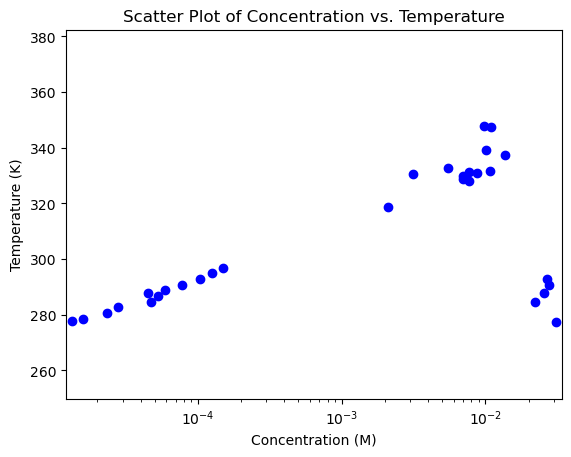

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your Excel file
file_path = r"C:\Users\jh8560\Documents\codes2024\comp_flory-hug\DefaultDataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Use iloc to access DataFrame columns
concentration = df.iloc[:, 0] / 1000 # moles(M)
temp_cels = df.iloc[:, 1] # temperature celsius
temp_abs = temp_cels +  273.15 # temperature absolute

# Create scatter plot
plt.scatter(concentration, temp_abs, color='blue', marker='o')

# Add labels and title
plt.xlabel('Concentration (M)')
plt.ylabel('Temperature (K)')
plt.title('Scatter Plot of Concentration vs. Temperature')

plt.xscale('log')
plt.xlim([concentration.min() * 0.9, concentration.max() * 1.1])
plt.ylim([temp_abs.min() * 0.9, temp_abs.max() * 1.1])


# Show plot
plt.show()


In [9]:
from scipy.interpolate import interp1d
from scipy.optimize import minimize

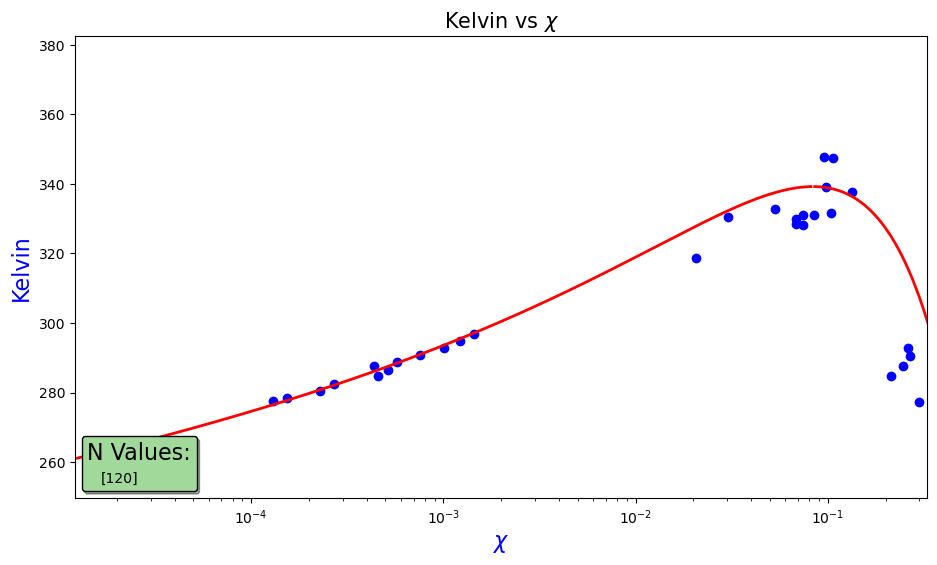

In [10]:
# Specify the path to your Excel file
file_path = r"C:\Users\jh8560\Documents\codes2024\comp_flory-hug\DefaultDataset.csv"

# Read the CSV file
df = pd.read_csv(file_path)


# Generate Laguerre polynomials
num_terms = 100
laguerre_polynomials = generate_laguerre_polynomials(num_terms)

#Verify that it returns the correct inverse
z=0.99999
hz=np.arctanh(z)/(z)
logepsZvec = hinv(hz, laguerre_polynomials)
epsZvec = np.exp(logepsZvec)
zvec = 1 - epsZvec


def analytical_sol(N, eps):
    hy = 0.5 * (np.log(2-eps) - np.log(eps)) / (1-eps)
    alpha =  hinv((1/N) * (hy) - (1/N) + 1, laguerre_polynomials)	  
    
    z = 1 -	np.exp(alpha)
    
    phiA = z * ((2.0-eps) / (z+(1.0-eps)))
    phiB = z * ((eps) / (z+(1.0-eps)))
    bvec = phiA + phiB
    term1 = (1/N - 1.0) / (bvec)
    term2 = (np.log(1+z)-np.log(1-z))/(bvec**(2) * (1.0-eps))
    chi = term1 + term2
    return (phiA, phiB, chi)
    


# Set N values
N_values = [120] 

# Initialize the plot
plt.figure(figsize=(11, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(N_values)))

eps_values = np.logspace(-30, -0.01, 5000)
for i, N in enumerate(N_values):
    
    # Lists to store solutions
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
   
        


    # Plotting
    #plt.plot(eps_values, chi_solutions, color=colors[i], linestyle='-', linewidth=2)
    #plt.annotate(f'N={N}', xy=(eps_values[1], chi_solutions[-1]), xytext=(0, 0), textcoords='offset points', color=colors[i], fontsize=9)

deltaE = 202 # Kb
Tphi = []
for i in chi_solutions:
    Tphi.append(deltaE / i)
plt.plot(phiA_solutions, Tphi, color='red', linestyle='-', linewidth=2)
plt.plot(phiB_solutions, Tphi, color='red', linestyle='-', linewidth=2)
concentration = df.iloc[:, 0] / 1000 # moles(M)
temp_cels = df.iloc[:, 1] # temperature celsius
temp_abs = temp_cels +  273.15 # temperature absolute

vol_frac = concentration * 13.1 / 1.35
# Create scatter plot
plt.scatter(vol_frac, temp_abs, color='blue', marker='o')

# Add labels and title
plt.xlabel('Volume Fraction (M)')
plt.ylabel('Temperature (K)')
plt.title('Scatter Plot of Volume Fraction vs. Temperature')

plt.xscale('log')
plt.xlim([concentration.min() * 0.9, vol_frac.max() * 1.1])
plt.ylim([temp_abs.min() * 0.9, temp_abs.max() * 1.1])


# Adding labels and title
plt.xlabel(r'$\chi$', fontsize=16, color='blue')
plt.ylabel(r'Kelvin', fontsize=16, color='blue')
plt.title(r'Kelvin vs $\chi$', fontsize=15)
plt.scatter([], [], color='none', label=f'{N_values}')
plt.xscale('log')
#plt.xlim(1e-10, 1)
#plt.ylim(0.5, 1)


# Adding a legend
plt.legend(title='N Values:', title_fontsize='16', fontsize='10', loc='lower left', frameon=True, shadow=True, framealpha=1, edgecolor='black', facecolor='#a1d99b', markerfirst=False)
plt.grid(False)

# Display the plot
plt.show()



[276.540317   277.7884976  280.79621433 282.12841358 286.5323751
 287.49753776 286.05483129 288.47662156 290.98776408 293.59329657
 295.47584634 297.12938408 327.79676853 332.32224086 337.48640233
 339.09634373 338.84607134 338.84607134 339.09634373 339.23173881
 338.70721454 336.4322697  338.95375238 339.04676127 338.55202691
 315.7905524  314.25296913 318.66004382 324.73814585 307.36005105]


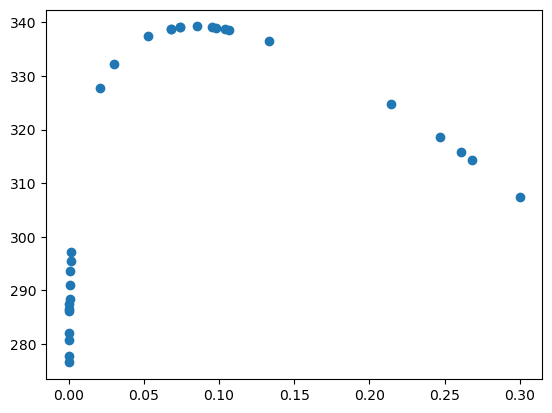

In [11]:
phi_all = np.concatenate((phiA_solutions, phiB_solutions))
Tphi_all = np.concatenate((Tphi, Tphi))
f = interp1d(phi_all, Tphi_all, kind='linear')  
Ti_model = f(vol_frac)
print(Ti_model)
plt.scatter(vol_frac, Ti_model, marker='o')

In [12]:
def sq_error(variables, vol_frac, T_exp):
    deltaE, N = variables
    eps_values = np.logspace(-30, -0.01, 5000)
        
    phiA_solutions = []
    phiB_solutions = []
    chi_solutions = []
    phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)

    Tphi = []
    for i in chi_solutions:
        Tphi.append(deltaE / i)
    
    phi_all = np.concatenate((phiA_solutions, phiB_solutions))
    Tphi_all = np.concatenate((Tphi, Tphi))
    f = interp1d(phi_all, Tphi_all, kind='linear')  
    Ti_model = f(vol_frac)
    sqE = np.sum((Ti_model - T_exp) **2)
    
    return sqE

188.78354178243868 192.661993129503


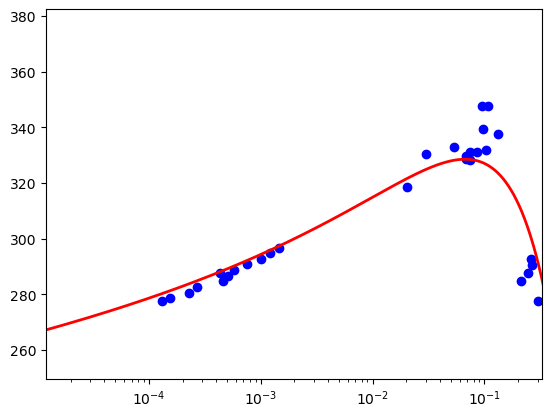

In [88]:
initial_guess = [202, 120]
values = minimize(sq_error, initial_guess, args=(vol_frac, temp_abs), method='trust-constr')
print(values.x[0], values.x[1])
N = values.x[1]
deltaE = values.x[0]

phiA_solutions = []
phiB_solutions = []
chi_solutions = []
    
phiA_solutions, phiB_solutions, chi_solutions = analytical_sol(N, eps_values)
Tphi = []
for i in chi_solutions:
    Tphi.append(deltaE / i)


plt.plot(phiA_solutions, Tphi, color='red', linestyle='-', linewidth=2)
plt.plot(phiB_solutions, Tphi, color='red', linestyle='-', linewidth=2)
plt.scatter(vol_frac, temp_abs, color='blue', marker='o')

plt.xscale('log')
plt.xlim([concentration.min() * 0.9, vol_frac.max() * 1.1])
plt.ylim([temp_abs.min() * 0.9, temp_abs.max() * 1.1])
plt.show()

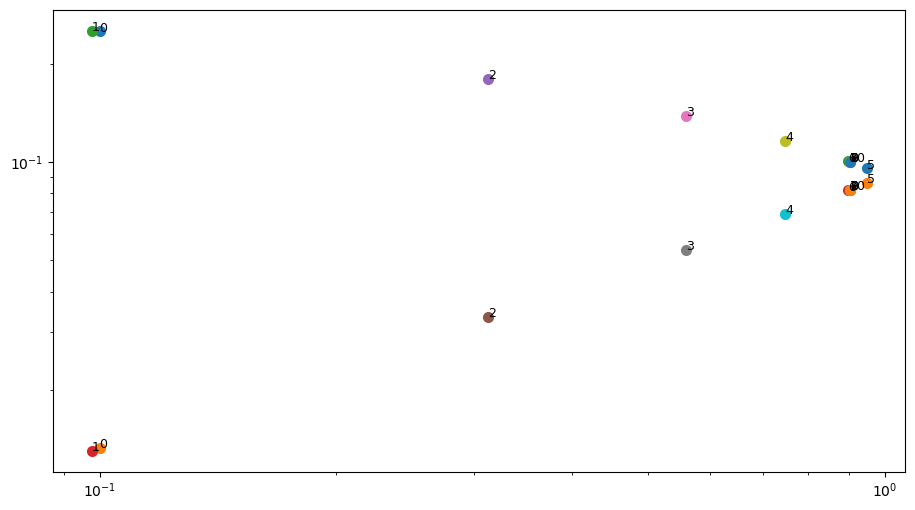

10


In [67]:

# variables
# target phi value
phi_target = 0.1
# initail chi value
chi = 10
# taget chi value
chi_target = 0.8
# tolerance
tol = 1e-8
# initial guesses
u0 = np.log(phi_target)
u1 = np.log(phi_target) * 1.01
# iteration variable
i = 1
# u from y = 1-e 
# e is epsilon
# 
u_vec = [u0, u1]
N = 100

# values 0, 1 given initial guess u0 and u1
phiA0, phiB0, chi0 = analytical_sol(N, np.exp(u0))
phiA1, phiB1, chi1 = analytical_sol(N, np.exp(u1))
plt.figure(figsize=(11, 6))

chi_list = [chi0, chi1]
phiA_list = [phiA0, phiA1]
phiB_list = [phiB0, phiB1]
phiC = 1 / (1+np.sqrt(N))

B_side = phi_target < phiC
    
if B_side:
    error = abs(np.log(phiB_list[1]) - np.log(phi_target))
else:
    error = abs(np.log(phiA_list[1]) - np.log(phi_target))
               
while error > tol:

    ui = u_vec[i]
    ui_m1 = u_vec[i-1]
    if i == 1:
        phiA, phiB, chi = analytical_sol(N, np.exp(ui))
        phiA_m1, phiB_m1, chi_m1 = analytical_sol(N, np.exp(ui_m1))
        
    if B_side:
        fui_m1 = np.log(phiB_m1) - np.log(phi_target)
        #print(phiB)
        #print(phiB_m1,'m')
        fui = np.log(phiB) - np.log(phi_target)        
        fp_i = (fui - fui_m1)/ (ui - ui_m1)
        ui_p1 = ui - (fui / fp_i)
    else:
        fui_m1 = np.log(phiA_m1) - np.log(phi_target)
        fui = np.log(phiA) - np.log(phi_target)        
        fp_i = (fui - fui_m1)/ (ui - ui_m1)
        ui_p1 = ui - (fui / fp_i)
    #print(fui,'fui')
    #print(fui_m1, 'fui_m1')
    if ui_p1 > 0:
        ui_p1 = ui/2
        
    
    phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, np.exp(ui_p1))

    u_vec.append(ui_p1)
    chi_list.append(chi_p1)
    chi_m1 = chi
    chi = chi_p1
    phiA_m1 = phiA
    phiA =  phiA_p1
    phiB_m1 = phiB
    phiB =  phiB_p1
    phiA_list.append(phiA_p1)
    phiB_list.append(phiB_p1)
    #print(u_vec)
    i+=1
    error = abs(fui)
    #print(error)

# Plotting
for i in range(len(u_vec)):
    plt.scatter(np.exp(u_vec[i]), phiA_list[i], linewidth=2, label=f'i={i}')
    plt.scatter(np.exp(u_vec[i]), phiB_list[i], linewidth=2, label=f'i={i}')
    plt.annotate(f'{i}', xy=(np.exp(u_vec[i]), phiA_list[i]), xytext=(.1, 0), textcoords='offset pixels', fontsize=9)
    plt.annotate(f'{i}', xy=(np.exp(u_vec[i]), phiB_list[i]), xytext=(.1, 0), textcoords='offset pixels', fontsize=9)



plt.yscale('log')
plt.xscale('log')

plt.show()

print(i)

In [99]:
def sq_error_secant(variables, vol_frac, T_exp):
    deltaE, N = variables

    chi= []
    for phi_exp in vol_frac:
        chi.append(chi_secant_eval(N, phi_exp))
    
    Tphi = []
    for i in chi:
        Tphi.append(deltaE / i)
    
    sqE = np.sum((Tphi - T_exp) **2)
    
    return sqE
    
def chi_secant_eval(N, phi_target):
    # tolerance
    tol = 1e-2
    # initial guesses
    u0 = np.log(phi_target)
    u1 = np.log(phi_target) * 1.01
    # iteration variable
    i = 1
    # u from y = 1-e 
    # e is epsilon
    # 
    u_vec = [u0, u1]
    # values 0, 1 given initial guess u0 and u1
    phiA0, phiB0, chi0 = analytical_sol(N, np.exp(u0))
    phiA1, phiB1, chi1 = analytical_sol(N, np.exp(u1))
    phiA_list = [phiA0, phiA1]
    phiB_list = [phiB0, phiB1]
    phiC = 1 / (1+np.sqrt(N))
    
    B_side = phi_target < phiC
        
    if B_side:
        error = abs(np.log(phiB_list[1]) - np.log(phi_target))
    else:
        error = abs(np.log(phiA_list[1]) - np.log(phi_target))
                   
    while error > tol:

        ui = u_vec[i]
        ui_m1 = u_vec[i-1]
        if i == 1:
            phiA, phiB, chi = analytical_sol(N, np.exp(ui))
            phiA_m1, phiB_m1, chi_m1 = analytical_sol(N, np.exp(ui_m1))
            
        if B_side:
            fui_m1 = np.log(phiB_m1) - np.log(phi_target)
            fui = np.log(phiB) - np.log(phi_target)        
            fp_i = (fui - fui_m1)/ (ui - ui_m1)
            ui_p1 = ui - (fui / fp_i)
        else:
            fui_m1 = np.log(phiA_m1) - np.log(phi_target)
            fui = np.log(phiA) - np.log(phi_target)        
            fp_i = (fui - fui_m1)/ (ui - ui_m1)
            ui_p1 = ui - (fui / fp_i)
        if ui_p1 > 0:
            ui_p1 = ui/10
            
        phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, np.exp(ui_p1))
    
        u_vec.append(ui_p1)
        chi_list.append(chi_p1)
        chi_m1 = chi
        chi = chi_p1
        phiA_m1 = phiA
        phiA =  phiA_p1
        phiB_m1 = phiB
        phiB =  phiB_p1
        phiA_list.append(phiA_p1)
        phiB_list.append(phiB_p1)
        i+=1
        if B_side:
            error = abs((phiB-phi_target)/(phi_target))
        else:
            error = abs((phiA-phi_target)/(phi_target))

    return chi_list[-1]

In [86]:
initial_guess = [202, 120]
values = minimize(sq_error_secant, initial_guess, args=(vol_frac, temp_abs), method='trust-constr')


In [87]:
print(values)
print(values.x[0],values.x[-1])

          message: `xtol` termination condition is satisfied.
          success: True
           status: 2
              fun: 2583.9322952191537
                x: [ 1.888e+02  1.927e+02]
              nit: 38
             nfev: 99
             njev: 33
             nhev: 0
         cg_niter: 60
     cg_stop_cond: 2
             grad: [-3.702e-05  4.069e-04]
  lagrangian_grad: [-3.702e-05  4.069e-04]
           constr: []
              jac: []
      constr_nfev: []
      constr_njev: []
      constr_nhev: []
                v: []
           method: equality_constrained_sqp
       optimality: 0.0004069488818484453
 constr_violation: 0
   execution_time: 26.445558786392212
        tr_radius: 4.159662554729801e-09
   constr_penalty: 1.0
            niter: 38
188.78421242638572 192.65234990282505


In [98]:
import time

# Start the timer
start_time = time.time()
initial_guess = [202, 120]
values = minimize(sq_error_secant, initial_guess, args=(vol_frac, temp_abs), method='trust-constr')
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")

Elapsed time: 20.073157 seconds


In [100]:
import numpy as np

def sq_error_secant(variables, vol_frac, T_exp):
    deltaE, N = variables

    chi = np.array([chi_secant_eval(N, phi_exp) for phi_exp in vol_frac])
    Tphi = deltaE / chi
    sqE = np.sum((Tphi - T_exp) ** 2)

    return sqE

def chi_secant_eval(N, phi_target):
    tol = 1e-2
    u0 = np.log(phi_target)
    u1 = u0 * 1.01
    
    phiA0, phiB0, chi0 = analytical_sol(N, np.exp(u0))
    phiA1, phiB1, chi1 = analytical_sol(N, np.exp(u1))
    
    u_vec = [u0, u1]
    phiA_list = [phiA0, phiA1]
    phiB_list = [phiB0, phiB1]
    chi_list = [chi0, chi1]
    
    phiC = 1 / (1 + np.sqrt(N))
    B_side = phi_target < phiC
    
    error = abs(np.log(phiB1 if B_side else phiA1) - np.log(phi_target))
    i = 1
    
    while error > tol:
        ui = u_vec[i]
        ui_m1 = u_vec[i-1]
        
        if i == 1:
            phiA, phiB, chi = phiA_list[1], phiB_list[1], chi_list[1]
            phiA_m1, phiB_m1, chi_m1 = phiA_list[0], phiB_list[0], chi_list[0]
        
        if B_side:
            fui_m1 = np.log(phiB_m1) - np.log(phi_target)
            fui = np.log(phiB) - np.log(phi_target)
        else:
            fui_m1 = np.log(phiA_m1) - np.log(phi_target)
            fui = np.log(phiA) - np.log(phi_target)
        
        fp_i = (fui - fui_m1) / (ui - ui_m1)
        ui_p1 = ui - (fui / fp_i)
        
        if ui_p1 > 0:
            ui_p1 = ui / 10
        
        phiA_p1, phiB_p1, chi_p1 = analytical_sol(N, np.exp(ui_p1))
        
        u_vec.append(ui_p1)
        chi_list.append(chi_p1)
        phiA_list.append(phiA_p1)
        phiB_list.append(phiB_p1)
        
        chi_m1 = chi
        chi = chi_p1
        phiA_m1 = phiA
        phiA = phiA_p1
        phiB_m1 = phiB
        phiB = phiB_p1
        i += 1
        
        error = abs((phiB - phi_target) / phi_target) if B_side else abs((phiA - phi_target) / phi_target)
    
    return chi_list[-1]


In [101]:
import time

# Start the timer
start_time = time.time()
initial_guess = [202, 120]
values = minimize(sq_error_secant, initial_guess, args=(vol_frac, temp_abs), method='trust-constr')
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time:.6f} seconds")

Elapsed time: 10.182154 seconds
